# RMS to interval velocity problem 

Forward mapping 

![](equation1.png)


- $v_int$: interval velocity
- $V_{rms}$: rms velocity 
- $w$:

inverse mapping 

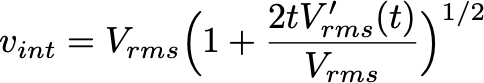

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

## define interval velocity 

$$v_{int} = v_0 + a \sin(2\pi f t)$$

$$or$$

$$v_{int} = v_0 + a \sin w$$

In [2]:
def interval_velocity_analytic(time, velocity0, amplitude, frequency, beta, beta0, omega): 
    """
    define our interval velocity as a harmonic function with amplitude (a), frequency (f), and base-value v0
    """
    #return velocity0 + amplitude *np.sin(omega*time) + beta * time
    return velocity0 + amplitude *np.sin(2*np.pi*frequency*time) + beta * time # this is how the eq was defined in class

- $B$: represents a constant rate of change of the interval velocity with respect to time.
- $w$: Omega is how fast the velocity is oscillating, back and forth. It determines the rate at which the sine wave, completes its Cycles.

In [3]:
a = 50
v0 = 2000
b = 20
b0 = 0 
f = 2
#check how limitate b to 0s ≤ t ≤ 2s
#check if frequency should be 2

In [4]:
n_times = 200 
max_time = 2
time = np.linspace(0, 2, n_times)
w = (2*np.pi*f*time)

In [5]:
# vint = interval_velocity_analytic(time, v0, a, b, w)
vint = interval_velocity_analytic(time=time, velocity0=v0, amplitude=a, frequency=f, beta=b, beta0=b0, omega=w)

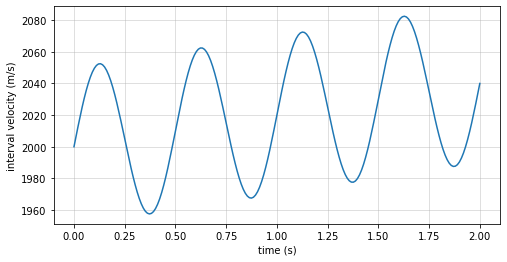

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4)) 

ax.plot(time, vint)
ax.set_xlabel("time (s)")
ax.set_ylabel("interval velocity (m/s)")
ax.grid(alpha=0.5)

# forward problem 

$$V_{rms}^2 (t) = \frac{1}{t}\int_0^{t_{max}} v_{int}^2(u) du$$

with 
- $v_{int} = v_0 + a \sin(2\pi f t)$
- $v_{int} = v_0 + a \sin(\omega t)$

ChatGPT
I asked to  $$ v_{int} = \int_0^{t_{max}} (v_0 + a \sin(\omega t) + Bt)^2 $$
integrate (v + a sin ⁡ ( ω t ) + B t )^2 from 0 to t

![](integral_chGPT.png)


<span style="color:red">There is a problem with v₀ in the following code</span>

In [7]:
def rms_velocity_analytic(time, velocity0, amplitude, frequency, beta): 
    omega = 2*np.pi*frequency

    inds_nonzero = time > 0 # in practice, you might want to pick a small number
    vrms2 = np.zeros_like(time) 
    # vrms2 = velocity0**2 * np.ones_like(time) 
    
    vrms2[inds_nonzero] = 1/time[inds_nonzero] * (
        (
            velocity0**2 * time[inds_nonzero] - ((2 * velocity0 * amplitude) / omega) * np.cos(omega * time[inds_nonzero]) -1) + velocity0 * beta *  time[inds_nonzero]**2  + (amplitude**2/2) * time[inds_nonzero]
            - ((amplitude**2)/(4 * omega)) * np.sin(2 * omega * time[inds_nonzero]) - ((2* amplitude * beta * time[inds_nonzero] * (np.cos(omega * time[inds_nonzero])/ omega)) + ((2* amplitude * beta * (np.sin(omega * time[inds_nonzero]))/ omega**2)) +
            ((beta**2) * (time[inds_nonzero]**3)/3)
        )
    )
    
    vrms = np.sqrt(vrms2)
    vrms[~inds_nonzero] = velocity0
    return vrms

Text(0, 0.5, 'RMS Velocity (m/s)')

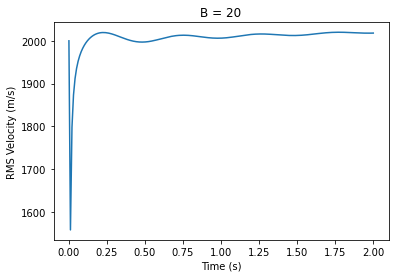

In [8]:
fig, ax = plt.subplots(1,1)

rms_velocity = rms_velocity_analytic(time, v0, a, f, b)

plt.plot(time, rms_velocity)

plt.title("B = 20")
plt.xlabel("Time (s)")
plt.ylabel("RMS Velocity (m/s)")

In [9]:
def rms_velocity_analytic(time, velocity0, amplitude, frequency, beta0): 
    omega = 2*np.pi*frequency

    inds_nonzero = time > 0 # in practice, you might want to pick a small number
    vrms2 = np.zeros_like(time) 
       
    vrms2[inds_nonzero] = 1/time[inds_nonzero] * (
        (
            velocity0**2 * time[inds_nonzero] - ((2 * velocity0 * amplitude) / omega) * np.cos(omega * time[inds_nonzero]) -1) + velocity0 * beta0 *  time[inds_nonzero]**2  + (amplitude**2/2) * time[inds_nonzero]
            - (amplitude**2/4 * omega) * np.sin(2* omega * time[inds_nonzero]) - ((2* amplitude * beta0 * time[inds_nonzero] * (np.cos(omega * time[inds_nonzero])/ omega)) + ((2* amplitude * beta0 * (np.sin(omega * time[inds_nonzero]))/ omega**2)) +
            ((beta0**2 * time[inds_nonzero]**3)/3)
        )
    )
    
    vrms = np.sqrt(vrms2)
    vrms[~inds_nonzero] = velocity0
    return vrms

Text(0, 0.5, 'RMS Velocity (m/s)')

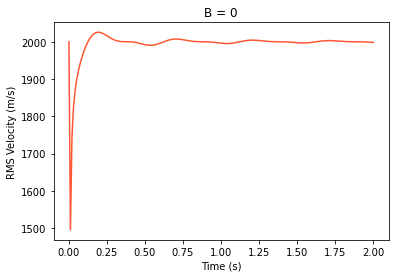

In [10]:
fig, ax = plt.subplots(1,1)

rms_velocity = rms_velocity_analytic(time, v0, a, f, b0)

plt.plot(time, rms_velocity, color="#FF5733")

plt.title("B = 0")
plt.xlabel("Time (s)")
plt.ylabel("RMS Velocity (m/s)")

# estimate vint from vrms2

$$v_{int} = V_{RMS} \left(1 + \frac{2 t V'_{RMS}}{V_{RMS}}\right)^{1/2}$$

In [11]:
vrms = rms_velocity_analytic(time, v0, a, f, b)

In [12]:
def compute_vint_from_vrms(time, vrms):
    dt = np.diff(time)
    dvdt_approx = np.diff(vrms) / dt
    dvdt_approx = np.r_[0, dvdt_approx]  # forward difference
    vint_rec = vrms * np.sqrt(
        1 + (2 * time * dvdt_approx)/vrms
    )
    return vint_rec 

In [13]:
vint_rec = compute_vint_from_vrms(time, vrms)

Text(0.5, 1.0, 'Estimating vint from vrms2')

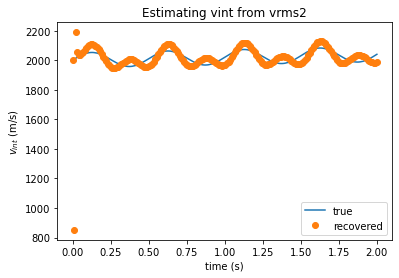

In [14]:
fig, ax = plt.subplots(1,1)

ax.plot(time, vint, label="true")
ax.plot(time, vint_rec, "o", label="recovered")
ax.set_ylabel("$v_{int}$ (m/s)")
ax.set_xlabel("time (s)")
ax.legend()
plt.title("Estimating vint from vrms2")

# Inverting with a finite number of accurate data

In [15]:
decimate = 8 #by increasing this number we see fewer datapoints and the linear interpolation starts to feet less the original data.

t_obs = time[::decimate]
vrms_obs = vrms[::decimate]

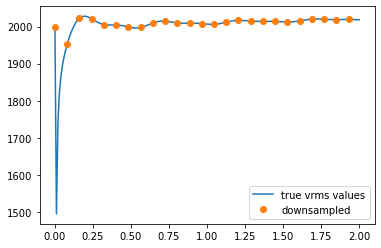

In [16]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vrms, label="true vrms values")
ax.plot(t_obs, vrms_obs, "o", label="downsampled")
ax.legend()

In [17]:
linear_interpolation = interp1d(t_obs, vrms_obs, kind="linear", fill_value="extrapolate") 

In [18]:
vrms_linear = linear_interpolation(time)

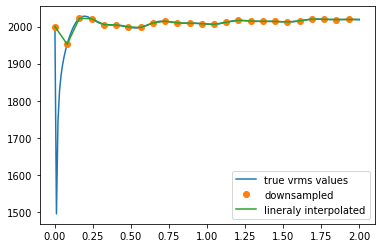

In [19]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vrms, label="true vrms values")
ax.plot(t_obs, vrms_obs, "o", label="downsampled")
ax.plot(time, vrms_linear, label="lineraly interpolated")
ax.legend()

In [20]:
linear_interpolation = interp1d(t_obs, vrms_obs, kind="linear", fill_value="extrapolate")
vrms_linear = linear_interpolation(time)

In [21]:
spline_interpolation = interp1d(t_obs, vrms_obs, kind="cubic", fill_value="extrapolate")
vrms_spline = spline_interpolation(time)

In [22]:
vint_linear_rec = compute_vint_from_vrms(time, vrms_linear)
vint_spline_rec = compute_vint_from_vrms(time, vrms_spline)

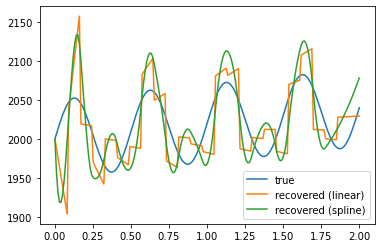

In [23]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vint, label="true")
ax.plot(time, vint_linear_rec, label="recovered (linear)")
ax.plot(time, vint_spline_rec, label="recovered (spline)")
ax.legend()

####  Decimation level: 2

In [24]:
decimate = 2 #by increasing this number we see fewer datapoints and the linear interpolation starts to feet less the original data.

t_obs = time[::decimate]
vrms_obs = vrms[::decimate]

Text(0.5, 1.0, '$Vrms$ decimation level 2')

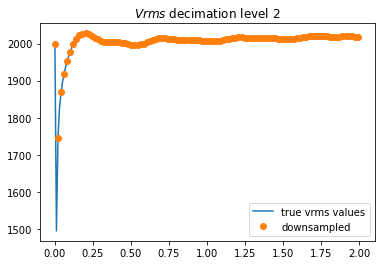

In [25]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vrms, label="true vrms values")
ax.plot(t_obs, vrms_obs, "o", label="downsampled")
ax.legend()
plt.title("$Vrms$ decimation level 2")

### recover the interval velocity (vrms)

In [26]:
vint_linear_rec = compute_vint_from_vrms(time, vrms_linear)

In [27]:
#defining interpolations

linear_interpolation = interp1d(t_obs, vrms_obs, kind="linear", fill_value="extrapolate")
vrms_linear = linear_interpolation(time)

spline_interpolation = interp1d(t_obs, vrms_obs, kind="cubic", fill_value="extrapolate")
vrms_spline = spline_interpolation(time)

#arranging equation
vint_linear_rec = compute_vint_from_vrms(time, vrms_linear)
vint_spline_rec = compute_vint_from_vrms(time, vrms_spline)

Text(0.5, 1.0, '$Vrms$ decimation level 2')

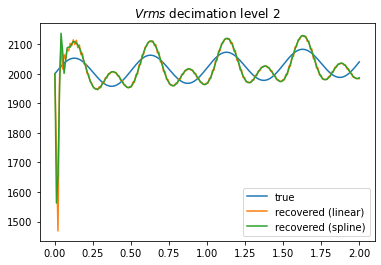

In [28]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vint, label="true")
ax.plot(time, vint_linear_rec, label="recovered (linear)")
ax.plot(time, vint_spline_rec, label="recovered (spline)")
ax.legend()
plt.title("$Vrms$ decimation level 2")

####  Decimation level: 6

In [29]:
decimate = 6 #by increasing this number we see fewer datapoints and the linear interpolation starts to feet less the original data.

t_obs = time[::decimate]
vrms_obs = vrms[::decimate]

Text(0.5, 1.0, '$Vrms$ decimation level 6')

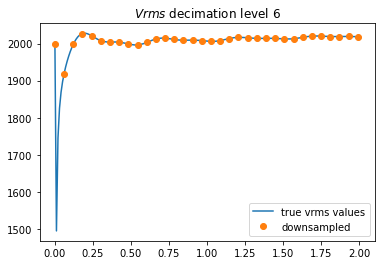

In [30]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vrms, label="true vrms values")
ax.plot(t_obs, vrms_obs, "o", label="downsampled")
ax.legend()
plt.title("$Vrms$ decimation level 6")

In [31]:
vint_linear_rec = compute_vint_from_vrms(time, vrms_linear)

In [32]:
#defining interpolations

linear_interpolation = interp1d(t_obs, vrms_obs, kind="linear", fill_value="extrapolate")
vrms_linear = linear_interpolation(time)

spline_interpolation = interp1d(t_obs, vrms_obs, kind="cubic", fill_value="extrapolate")
vrms_spline = spline_interpolation(time)

#arranging equation
vint_linear_rec = compute_vint_from_vrms(time, vrms_linear)
vint_spline_rec = compute_vint_from_vrms(time, vrms_spline)

Text(0.5, 1.0, '$Vrms$ decimation level 6')

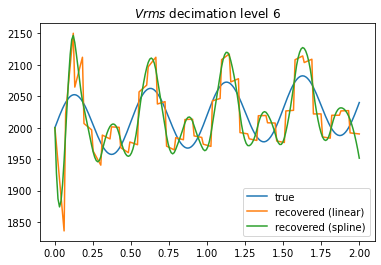

In [33]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vint, label="true")
ax.plot(time, vint_linear_rec, label="recovered (linear)")
ax.plot(time, vint_spline_rec, label="recovered (spline)")
ax.legend()
plt.title("$Vrms$ decimation level 6")

####  Decimation level: 10

In [34]:
decimate = 10 #by increasing this number we see fewer datapoints and the linear interpolation starts to feet less the original data.

t_obs = time[::decimate]
vrms_obs = vrms[::decimate]

Text(0.5, 1.0, '$Vrms$ decimation level 6')

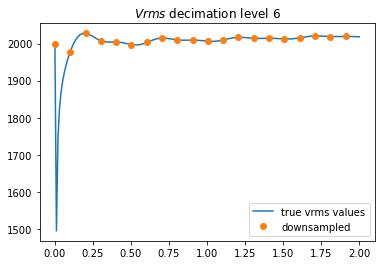

In [35]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vrms, label="true vrms values")
ax.plot(t_obs, vrms_obs, "o", label="downsampled")
ax.legend()
plt.title("$Vrms$ decimation level 6")

In [36]:
vint_linear_rec = compute_vint_from_vrms(time, vrms_linear)

In [37]:
#defining interpolations

linear_interpolation = interp1d(t_obs, vrms_obs, kind="linear", fill_value="extrapolate")
vrms_linear = linear_interpolation(time)

spline_interpolation = interp1d(t_obs, vrms_obs, kind="cubic", fill_value="extrapolate")
vrms_spline = spline_interpolation(time)

#arranging equation
vint_linear_rec = compute_vint_from_vrms(time, vrms_linear)
vint_spline_rec = compute_vint_from_vrms(time, vrms_spline)

Text(0.5, 1.0, '$Vrms$ decimation level 10')

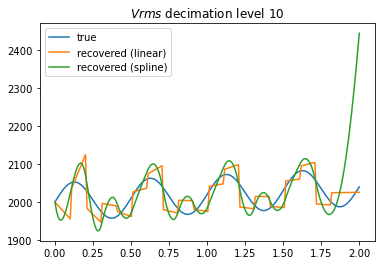

In [38]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vint, label="true")
ax.plot(time, vint_linear_rec, label="recovered (linear)")
ax.plot(time, vint_spline_rec, label="recovered (spline)")
ax.legend()
plt.title("$Vrms$ decimation level 10")

###  Gaussian random noise in the data with standard deviations of 0.5 m/s

In [52]:
#assuming we're working with a gaussean distribuition

decimate = 8 #by increasing this number we see fewer datapoints and the linear interpolation starts to feet less the original data.
std = 0.5 #as higher as conservative

t_obs = time[::decimate]
noise_vector = std * np.random.randn(len(t_obs))
vrms_obs = vrms[::decimate] + std * np.random.randn(len(t_obs)) #np.random.randn plots numbers with the mean of z and the standard normal distribution (also known as standard deviation) of 1

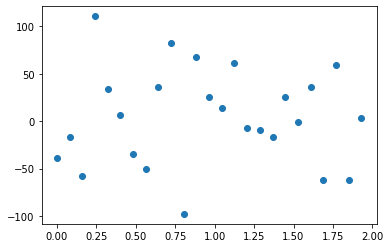

In [53]:
plt.plot(t_obs, noise_vector, "o")

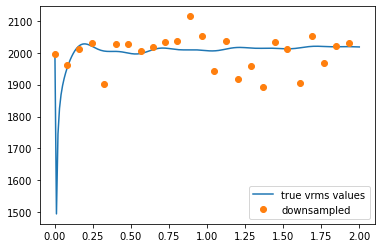

In [54]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vrms, label="true vrms values")
ax.plot(t_obs, vrms_obs, "o", label="downsampled")
ax.legend()
plt.title("$Vrms$ std = 0.5")

In [57]:
linear_interpolation = interp1d(t_obs, vrms_obs, kind="linear", fill_value="extrapolate")
vrms_linear = linear_interpolation(time)

In [58]:
spline_interpolation = interp1d(t_obs, vrms_obs, kind="cubic", fill_value="extrapolate")
vrms_spline = spline_interpolation(time)

Text(0.5, 1.0, '$Vrms$ std = 50')

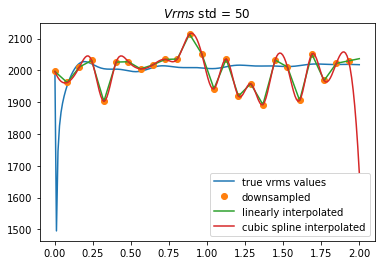

In [59]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vrms, label="true vrms values")
ax.plot(t_obs, vrms_obs, "o", label="downsampled")
ax.plot(time, vrms_linear, label="linearly interpolated")
ax.plot(time, vrms_spline, label="cubic spline interpolated")
ax.legend()
plt.title("$Vrms$ std = 0.5")

###  Gaussian random noise in the data with standard deviations of 1 m/s

In [ ]:
#assuming we're working with a gaussean distribuition

decimate = 8 #by increasing this number we see fewer datapoints and the linear interpolation starts to feet less the original data.
std = 1 #as higher as conservative

t_obs = time[::decimate]
noise_vector = std * np.random.randn(len(t_obs))
vrms_obs = vrms[::decimate] + std * np.random.randn(len(t_obs)) #np.random.randn plots numbers with the mean of z and the standard normal distribution (also known as standard deviation) of 1

In [ ]:
plt.plot(t_obs, noise_vector, "o")

In [ ]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vrms, label="true vrms values")
ax.plot(t_obs, vrms_obs, "o", label="downsampled")
ax.legend()
plt.title("$Vrms$ std = 1")

In [ ]:
linear_interpolation = interp1d(t_obs, vrms_obs, kind="linear", fill_value="extrapolate")
vrms_linear = linear_interpolation(time)

In [ ]:
spline_interpolation = interp1d(t_obs, vrms_obs, kind="cubic", fill_value="extrapolate")
vrms_spline = spline_interpolation(time)

In [ ]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vrms, label="true vrms values")
ax.plot(t_obs, vrms_obs, "o", label="downsampled")
ax.plot(time, vrms_linear, label="linearly interpolated")
ax.plot(time, vrms_spline, label="cubic spline interpolated")
ax.legend()
plt.title("$Vrms$ std = 1")

###  Gaussian random noise in the data with standard deviations of 1.5 m/s

In [ ]:
#assuming we're working with a gaussean distribuition

decimate = 8 #by increasing this number we see fewer datapoints and the linear interpolation starts to feet less the original data.
std = 1.5 #as higher as conservative

t_obs = time[::decimate]
noise_vector = std * np.random.randn(len(t_obs))
vrms_obs = vrms[::decimate] + std * np.random.randn(len(t_obs)) #np.random.randn plots numbers with the mean of z and the standard normal distribution (also known as standard deviation) of 1

In [ ]:
plt.plot(t_obs, noise_vector, "o")

In [ ]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vrms, label="true vrms values")
ax.plot(t_obs, vrms_obs, "o", label="downsampled")
ax.legend()
plt.title("$Vrms$ std = 1.5")

In [ ]:
linear_interpolation = interp1d(t_obs, vrms_obs, kind="linear", fill_value="extrapolate")
vrms_linear = linear_interpolation(time)

In [ ]:
spline_interpolation = interp1d(t_obs, vrms_obs, kind="cubic", fill_value="extrapolate")
vrms_spline = spline_interpolation(time)

In [ ]:
fig, ax = plt.subplots(1, 1)

ax.plot(time, vrms, label="true vrms values")
ax.plot(t_obs, vrms_obs, "o", label="downsampled")
ax.plot(time, vrms_linear, label="linearly interpolated")
ax.plot(time, vrms_spline, label="cubic spline interpolated")
ax.legend()
plt.title("$Vrms$ std = 1")

## Derivative of $Vint$